In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data=pd.read_excel('Ass1.xlsx')
data.head(3)

,Day,Outlook,Temp,Humid,Wind,PlayTennis
0,d1,sunny,hot,high,weak,no
1,d2,sunny,hot,high,strong,no
2,d3,overcast,hot,high,weak,yes


In [51]:
X=data.drop(["Day","PlayTennis"],axis=1)
y=data.PlayTennis

In [52]:
#mapping Outlook
X.loc[data["Outlook"]=="sunny","Outlook"]=0
X.loc[data["Outlook"]=="rainy","Outlook"]=1
X.loc[data["Outlook"]=="overcast","Outlook"]=2

#mapping Temp
X.loc[data["Temp"]=="hot","Temp"]=0
X.loc[data["Temp"]=="medium","Temp"]=1
X.loc[data["Temp"]=="cool","Temp"]=2


#mapping Humid
X.loc[data["Humid"]=="high","Humid"]=0
X.loc[data["Humid"]=="normal","Humid"]=1

#mapping Wind
X.loc[data["Wind"]=="weak","Wind"]=0
X.loc[data["Wind"]=="strong","Wind"]=1

In [53]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
import pydotplus
from IPython.display import Image

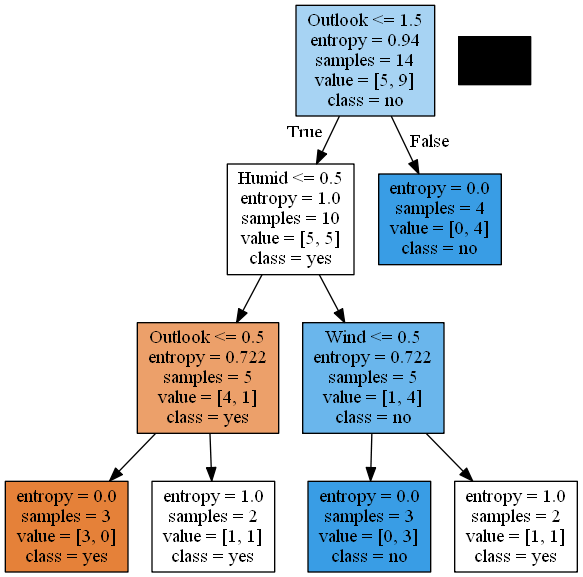

In [57]:
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['yes','no'],filled=True,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#graph.write_png('tree.png')

In [59]:
test=pd.read_excel('Ass1.xlsx',sheet_name="test")
test.head(3)

,Day,Outlook,Temp,Humid,Wind,PlayTennis
0,d1,sunny,cool,normal,strong,yes
1,d2,sunny,hot,high,strong,no
2,d3,overcast,medium,high,weak,yes


In [61]:
testY=test.PlayTennis
testX=test.drop(["Day","PlayTennis"],axis=1)

In [62]:
#mapping Outlook
testX.loc[data["Outlook"]=="sunny","Outlook"]=0
testX.loc[data["Outlook"]=="rainy","Outlook"]=1
testX.loc[data["Outlook"]=="overcast","Outlook"]=2

#mapping Temp
testX.loc[data["Temp"]=="hot","Temp"]=0
testX.loc[data["Temp"]=="medium","Temp"]=1
testX.loc[data["Temp"]=="cool","Temp"]=2


#mapping Humid
testX.loc[data["Humid"]=="high","Humid"]=0
testX.loc[data["Humid"]=="normal","Humid"]=1

#mapping Wind
testX.loc[data["Wind"]=="weak","Wind"]=0
testX.loc[data["Wind"]=="strong","Wind"]=1

In [63]:
predY=clf.predict(testX)
predY

array(['no', 'no', 'yes', 'no'], dtype=object)

In [64]:
predictions=pd.concat([test["Day"],pd.Series(predY,name="Predicted Class"),pd.Series(testY,name="Ground Truth")],axis=1)             
predictions

,Day,Predicted Class,Ground Truth
0,d1,no,yes
1,d2,no,no
2,d3,yes,yes
3,d4,no,no


In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, clf.predict(testX)))

0.75
